In [517]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import seaborn as sns
import os
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [518]:
# # check installed version
# import pycaret
# pycaret.__version__

In [519]:
# Retrieve path and load the data
path = os.getcwd()
df = pd.read_csv(path+"/train.csv")

# Number of rows and columns
print('df train', df.shape)

df.head(3)

df train (6895, 70)


,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position
0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,Mexican Liga MX,1,29,NaN,2021-07-12,2026,Mexico,NaN,Right,5,3,1,Medium/High,Normal (170-185),No,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB
1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,Scottish Premiership,1,4,NaN,2021-07-23,2022,Austria,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM
2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,Danish Superliga,1,19,NaN,2021-07-24,2026,Sweden,NaN,Left,3,3,1,High/Medium,Normal (170-185),No,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB


In [520]:
df.columns

Index(['id', 'short_name', 'overall', 'potential', 'value_eur', 'wage_eur',
       'birthday_date', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'league_level', 'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_name', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'pow

## Dealing with NA

In [521]:
# Function to create table of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

                # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [522]:
# Check the NAs
print(missing_values_table(df))

Your selected dataframe has 70 columns.
There are 14 columns that have missing values.
                      Missing Values  % of Total Values
club_loaned_from                6544               94.9
nation_jersey_number            6482               94.0
goalkeeping_speed               6264               90.8
player_tags                     6124               88.8
player_traits                   2589               37.5
pace                             631                9.2
shooting                         631                9.2
passing                          631                9.2
dribbling                        631                9.2
defending                        631                9.2
physic                           631                9.2
release_clause_eur               353                5.1
club_joined                      351                5.1
value_eur                          2                0.0


In [523]:
columns_to_drop = ['club_loaned_from', 'nation_jersey_number', 'goalkeeping_speed', 'player_tags']
df = df.drop(columns=columns_to_drop)

In [524]:
# Check the NAs
print(missing_values_table(df))

Your selected dataframe has 66 columns.
There are 10 columns that have missing values.
                    Missing Values  % of Total Values
player_traits                 2589               37.5
pace                           631                9.2
shooting                       631                9.2
passing                        631                9.2
dribbling                      631                9.2
defending                      631                9.2
physic                         631                9.2
release_clause_eur             353                5.1
club_joined                    351                5.1
value_eur                        2                0.0


Ideas, what to do with variables:
short_name - drop
birthday_date - divide by year, month, day - for regression will need only year, so we can replace just by year + dummies, it's categorical
club_name - encode by ... - but does it really matter for the position?
league_name - encode by ... - but does it really matter for the position?
nationality_name - dummies (we have big dataset, can have lots of dummies) - but does it really matter for the position?
club_joined - divide by year, month, day - for regression will need only year, so we can replace just by year - but does it really matter for the position?
preffered_foot - dummy
real_face - dummy
work_rate - find unique values - rating or dummies (there are strange values i can not interpret - so dummies)
body_type - check unique values, then divide word, first number in the bracket, second number in the bracket after -, we actually have height already, so we can keep only type and encode with rating
player_traits - don't know really... have to use some variables to encode and impute as well=)

In [525]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df.head(1))

       id short_name  overall  potential  value_eur  wage_eur birthday_date  \
0  216302  E. García       71         71  1400000.0     10000    1989-12-28   

   height_cm  weight_kg                  club_name      league_name  \
0        176         73  Club Atlético de San Luis  Mexican Liga MX   

   league_level  club_jersey_number club_joined  club_contract_valid_until  \
0             1                  29  2021-07-12                       2026   

  nationality_name preferred_foot  weak_foot  skill_moves  \
0           Mexico          Right          5            3   

   international_reputation    work_rate         body_type real_face  \
0                         1  Medium/High  Normal (170-185)        No   

   release_clause_eur  player_traits  pace  shooting  passing  dribbling  \
0           2400000.0  Early Crosser  70.0      52.0     60.0       70.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       67.0    66.0                  64               

In [526]:
# Dealing with dates (will keep only year)
def replace_date_with_year(df, date_columns):
    for column in date_columns:
        df[column] = pd.to_datetime(df[column]).dt.year
    return df

# Columns to replace values with the year
date_columns = ['birthday_date', 'club_joined']

# Apply the function
df = replace_date_with_year(df, date_columns)

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur  \
0  216302    E. García       71         71  1400000.0     10000   
1  237867   D. Cancola       65         71  1000000.0      2000   
2  253472      E. Kahl       65         77  1600000.0      2000   
3  223994    S. Mugoša       72         72  2300000.0      5000   
4  251635  A. Țigănașu       65         65   525000.0      3000   

   birthday_date  height_cm  weight_kg                  club_name  \
0           1989        176         73  Club Atlético de San Luis   
1           1996        183         73             Ross County FC   
2           2001        178         69                  Aarhus GF   
3           1992        188         81          Incheon United FC   
4           1990        179         74                FC Botoşani   

            league_name  league_level  club_jersey_number  club_joined  \
0       Mexican Liga MX             1                  29       2021.0   
1  Scottish Premiership           

In [527]:
# Specify the columns to impute
columns_to_impute = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'release_clause_eur', 'club_joined', 'value_eur']

# Create a KNNImputer object with k=3 
imputer = KNNImputer(n_neighbors=3) 

# Perform KNN imputation only on the specified columns for the training data
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [528]:
# Check the NAs
print(missing_values_table(df))

Your selected dataframe has 66 columns.
There are 1 columns that have missing values.
               Missing Values  % of Total Values
player_traits            2589               37.5


## Outliers and Unique Values

In [529]:
def plot_boxplots(data, variables, plots_per_row=2):
    num_variables = len(variables)
    num_rows = math.ceil(num_variables / plots_per_row)

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)

    for i, variable in enumerate(variables):
        row, col = divmod(i, plots_per_row)
        ax = axes[row, col] if num_rows > 1 else axes[col]

        ax.boxplot(data[variable])
        ax.set_title(f'Boxplot of {variable}')
        ax.set_ylabel(variable)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.show()

In [530]:
num_vars = ['id',  'overall', 'potential', 'value_eur', 'wage_eur',
       'height_cm', 'weight_kg',
       'league_level', 'club_jersey_number', 
       'club_contract_valid_until',
       'weak_foot', 'skill_moves',
       'international_reputation', 
       'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

non_num_vars = ['birthday_date', 'position', 'short_name', 'birthday_date', 'club_name', 'league_name', 'club_joined','nationality_name', 'preferred_foot', 'work_rate', 'body_type', 'real_face', 'player_traits', ]

In [531]:
# # Execute
# columns = num_vars
# plot_boxplots(df, columns, plots_per_row=2)

In [532]:
# Custom function to calculate the number of unique values for given columns
def calculate_unique_counts(dataframe, columns):
    unique_counts = {}
    for column in columns:
        unique_count = dataframe[column].nunique()
        unique_counts[column] = unique_count
    return unique_counts

# List of columns for which you want to calculate unique counts
columns_to_check = non_num_vars

# Calculate unique counts for the specified columns
unique_counts = calculate_unique_counts(df, columns_to_check)

# Print the results
for column, count in unique_counts.items():
    print(f"Number of unique values in {column}: {count}")

Number of unique values in birthday_date: 27
Number of unique values in position: 24
Number of unique values in short_name: 6692
Number of unique values in club_name: 701
Number of unique values in league_name: 55
Number of unique values in club_joined: 31
Number of unique values in nationality_name: 144
Number of unique values in preferred_foot: 2
Number of unique values in work_rate: 9
Number of unique values in body_type: 10
Number of unique values in real_face: 2
Number of unique values in player_traits: 772


In [533]:
# Unique values for strings
def calculate_value_counts(df, columns, top_n=10):
    
    for column in columns:
        # Calculate the count of each unique value
        value_counts = df[column].value_counts()

        # Calculate the percentage of each unique value
        percentage = (value_counts / len(df)) * 100

        # Create a new DataFrame to display the results
        result_df = pd.DataFrame({column: value_counts.index, 'Count': value_counts, 'Percentage': percentage})

        # Display the top values
        print(result_df.head(top_n))

# Example usage with multiple columns
columns = ['preferred_foot', 'work_rate', 'body_type', 'real_face']
calculate_value_counts(df, columns, top_n=10)

               preferred_foot  Count  Percentage
preferred_foot                                  
Right                   Right   5209   75.547498
Left                     Left   1686   24.452502
                   work_rate  Count  Percentage
work_rate                                      
Medium/Medium  Medium/Medium   3125   45.322698
High/Medium      High/Medium   1456   21.116751
Medium/High      Medium/High    856   12.414793
High/High          High/High    535    7.759246
High/Low            High/Low    299    4.336476
Medium/Low        Medium/Low    246    3.567803
Low/High            Low/High    197    2.857143
Low/Medium        Low/Medium    168    2.436548
Low/Low              Low/Low     13    0.188542
                         body_type  Count  Percentage
body_type                                            
Normal (170-185)  Normal (170-185)   2471   35.837563
Normal (185+)        Normal (185+)   1630   23.640319
Lean (170-185)      Lean (170-185)   1280   18.564177
Lean (

In [534]:
# Unique values for player_traits
columns = ['player_traits']
calculate_value_counts(df, columns, top_n=50)

                                                                                        player_traits  \
player_traits                                                                                           
Speed Dribbler (AI)                                                               Speed Dribbler (AI)   
Power Header                                                                             Power Header   
Dives Into Tackles (AI)                                                       Dives Into Tackles (AI)   
Long Passer (AI)                                                                     Long Passer (AI)   
Long Shot Taker (AI)                                                             Long Shot Taker (AI)   
Technical Dribbler (AI)                                                       Technical Dribbler (AI)   
Injury Prone                                                                             Injury Prone   
Leadership                                             

## Correlations

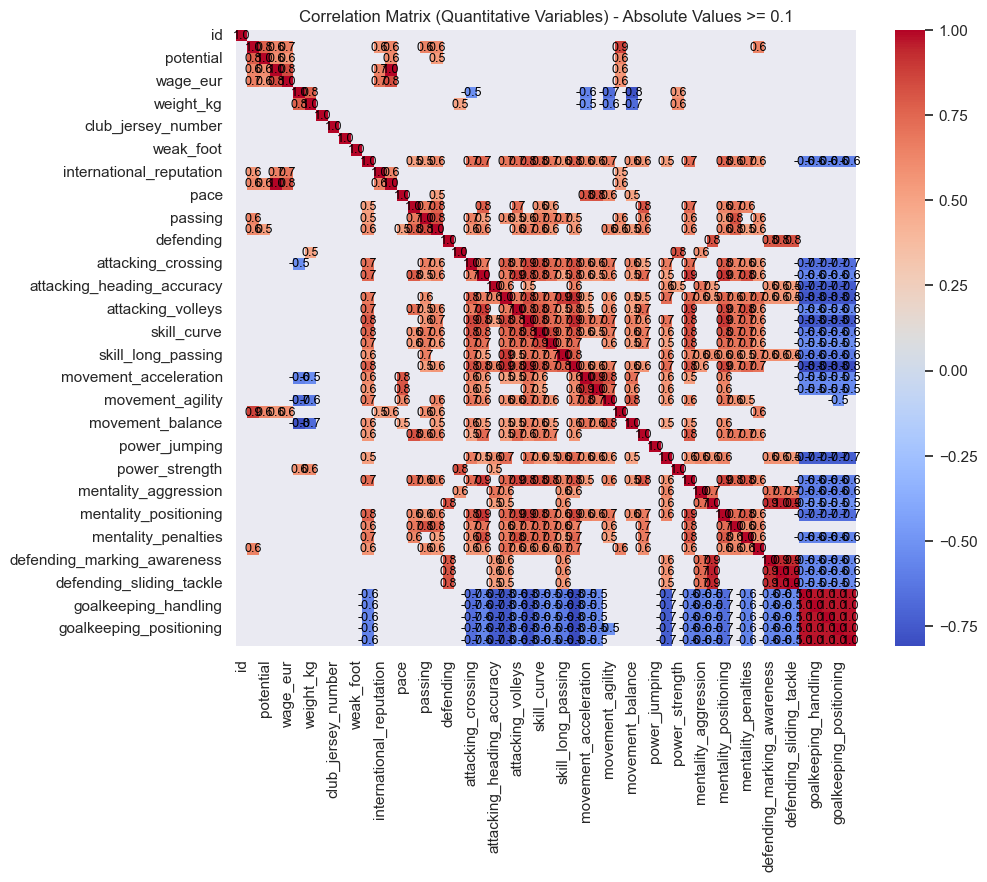

In [535]:
# Correlations among the variables with abs(correlation) >= 0.1
df_for_heatmap = df[['id',  'overall', 'potential', 'value_eur', 'wage_eur',
       'height_cm', 'weight_kg',
       'league_level', 'club_jersey_number', 
       'club_contract_valid_until',
       'weak_foot', 'skill_moves',
       'international_reputation', 
       'release_clause_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]
df_for_heatmap_corr = df_for_heatmap.corr()

# Filter correlations with abs(correlation) >= 0.1
mask = (df_for_heatmap_corr.abs() >= 0.5)
df_for_heatmap_corr_filtered = df_for_heatmap_corr[mask]

# Plot correlations with adjusted font size and text color
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_for_heatmap_corr_filtered, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 9, "color": "black"})
plt.title('Correlation Matrix (Quantitative Variables) - Absolute Values >= 0.1')
plt.show()

## Encoding

In [536]:
# Dealing with body_type
# body_type                                            
# Normal (170-185)  Normal (170-185)   1409   37.643601
# Lean (170-185)      Lean (170-185)    768   20.518301
# Normal (185+)        Normal (185+)    711   18.995458
# Lean (185+)            Lean (185+)    268    7.160032
# Normal (170-)        Normal (170-)    168    4.488378
# Stocky (170-185)  Stocky (170-185)    148    3.954048
# Lean (170-)            Lean (170-)     87    2.324339
# Unique                      Unique     76    2.030457
# Stocky (185+)        Stocky (185+)     73    1.950307
# Stocky (170-)        Stocky (170-)     35    0.935079
# As far as we already have height, i'll replace values with Normal/Lean/Stocky/Unique and then create dummies

# Replace values with the word before parenthesis
df['body_type'] = df['body_type'].str.extract(r'(\w+)\s*\(')

# Keep "Unique" if it is present in the original column
df.loc[df['body_type'].isna(), 'body_type'] = 'Unique'

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur  \
0  216302    E. García       71         71  1400000.0     10000   
1  237867   D. Cancola       65         71  1000000.0      2000   
2  253472      E. Kahl       65         77  1600000.0      2000   
3  223994    S. Mugoša       72         72  2300000.0      5000   
4  251635  A. Țigănașu       65         65   525000.0      3000   

   birthday_date  height_cm  weight_kg                  club_name  \
0           1989        176         73  Club Atlético de San Luis   
1           1996        183         73             Ross County FC   
2           2001        178         69                  Aarhus GF   
3           1992        188         81          Incheon United FC   
4           1990        179         74                FC Botoşani   

            league_name  league_level  club_jersey_number  club_joined  \
0       Mexican Liga MX             1                  29       2021.0   
1  Scottish Premiership           

In [537]:
# Dealing with work_rate                                      
# Medium/Medium  Medium/Medium   1231   32.888058
# High/Medium      High/Medium   1005   26.850120
# Medium/High      Medium/High    511   13.652151
# High/High          High/High    409   10.927064
# High/Low            High/Low    215    5.744056
# Medium/Low        Medium/Low    170    4.541811
# Low/High            Low/High    118    3.152551
# Low/Medium        Low/Medium     76    2.030457
# Low/Low              Low/Low      8    0.213732
# I don't know, what Low/High means, so i'd rather create dummies

In [538]:
# Function to create dummies
def one_hot(df, columns):
    dummy = pd.get_dummies(df[columns])
    encoded_df = pd.concat([df, dummy], axis=1)
    return encoded_df

# Columns to create dummies for
columns_to_encode = ['preferred_foot', 'work_rate', 'body_type', 'nationality_name']

# Apply the one_hot function
df = one_hot(df, columns_to_encode)

# Drop the original columns after creating dummies
df = df.drop(columns=columns_to_encode)

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur  \
0  216302    E. García       71         71  1400000.0     10000   
1  237867   D. Cancola       65         71  1000000.0      2000   
2  253472      E. Kahl       65         77  1600000.0      2000   
3  223994    S. Mugoša       72         72  2300000.0      5000   
4  251635  A. Țigănașu       65         65   525000.0      3000   

   birthday_date  height_cm  weight_kg                  club_name  \
0           1989        176         73  Club Atlético de San Luis   
1           1996        183         73             Ross County FC   
2           2001        178         69                  Aarhus GF   
3           1992        188         81          Incheon United FC   
4           1990        179         74                FC Botoşani   

            league_name  league_level  club_jersey_number  club_joined  \
0       Mexican Liga MX             1                  29       2021.0   
1  Scottish Premiership           

In [539]:
# # Moved earlier to deal with NaNs
# # Dealing with dates (will keep only year)
# def replace_date_with_year(df, date_columns):
#     for column in date_columns:
#         df[column] = pd.to_datetime(df[column]).dt.year
#     return df

# # Columns to replace values with the year
# date_columns = ['birthday_date', 'club_joined']

# # Apply the function
# df = replace_date_with_year(df, date_columns)

# # Display the resulting DataFrame
# print(df.head())


In [540]:
# Dummy for the year of birth
dummy_year = pd.get_dummies(df['birthday_date'], prefix= 'Year').astype(int)
df = pd.concat([df, dummy_year], axis=1)
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur  \
0  216302    E. García       71         71  1400000.0     10000   
1  237867   D. Cancola       65         71  1000000.0      2000   
2  253472      E. Kahl       65         77  1600000.0      2000   
3  223994    S. Mugoša       72         72  2300000.0      5000   
4  251635  A. Țigănașu       65         65   525000.0      3000   

   birthday_date  height_cm  weight_kg                  club_name  \
0           1989        176         73  Club Atlético de San Luis   
1           1996        183         73             Ross County FC   
2           2001        178         69                  Aarhus GF   
3           1992        188         81          Incheon United FC   
4           1990        179         74                FC Botoşani   

            league_name  league_level  club_jersey_number  club_joined  \
0       Mexican Liga MX             1                  29       2021.0   
1  Scottish Premiership           

In [541]:
# # Function for target encoding
# # Left the columns i used to encode on so far - will drop it later because of collinearity (but probably in case of body_type will drop it and keep weight and actuallly the same for other variables i'm encoding)

# def target_encode(df, encoding_dict):
#     for group_by_column, encode_column in encoding_dict.items():
#         # Calculate mean encoding for each group
#         mean_encoding = df.groupby(group_by_column)[encode_column].mean()
        
#         # Map the mean encoding values back to the original DataFrame
#         df[f'{encode_column}_target_encoded'] = df[group_by_column].map(mean_encoding)
    
#     return df

# # Dictionary for target encoding {group_by_column: encode_column}
# encoding_dict = {'columns?': 'nationality_name', 'columns?': 'club_name', 'columns?': 'league_name'}

# # Apply the function
# df = target_encode(df, encoding_dict)

# # Display the resulting DataFrame
# print(df.head())




## Player Traits

In [542]:
# Function to remove (AI) - don't know, what is that

def remove_ai(df, column):
    df[traits_column] = df[traits_column].str.replace(r'\s*\([^)]*\)', '', regex=True)
    return df

# Column to process
column = 'player_traits'

# Apply the function
df = remove_ai(df, column)

# Display the resulting DataFrame
print(df.head())


       id   short_name  overall  potential  value_eur  wage_eur  \
0  216302    E. García       71         71  1400000.0     10000   
1  237867   D. Cancola       65         71  1000000.0      2000   
2  253472      E. Kahl       65         77  1600000.0      2000   
3  223994    S. Mugoša       72         72  2300000.0      5000   
4  251635  A. Țigănașu       65         65   525000.0      3000   

   birthday_date  height_cm  weight_kg                  club_name  \
0           1989        176         73  Club Atlético de San Luis   
1           1996        183         73             Ross County FC   
2           2001        178         69                  Aarhus GF   
3           1992        188         81          Incheon United FC   
4           1990        179         74                FC Botoşani   

            league_name  league_level  club_jersey_number  club_joined  \
0       Mexican Liga MX             1                  29       2021.0   
1  Scottish Premiership           

In [543]:
# Ensure all values are strings and split each entry into a list of traits
traits_lists = [str(value).split(', ') if pd.notna(value) else [] for value in df['player_traits']]

# Flatten the list of lists
all_traits = [trait for sublist in traits_lists for trait in sublist]

# Create a set to get unique traits
unique_traits_set = set(all_traits)

# Convert the set to a list
unique_traits_list = list(unique_traits_set)

# Calculate the length of the list
list_length = len(unique_traits_list)

# Display the list of unique traits and its length
print("Unique Traits:", unique_traits_list)
print("Length of Unique Traits List:", list_length)





Unique Traits: ['Team Player', 'Flair', 'Long Passer', 'Long Shot Taker', 'Dives Into Tackles', 'Power Header', 'GK Long Throw', 'Long Throw-in', 'Speed Dribbler', 'Outside Foot Shot', 'Cautious With Crosses', 'Injury Prone', 'Power Free-Kick', 'Technical Dribbler', 'Solid Player', 'Playmaker', 'Leadership', 'Giant Throw-in', 'Finesse Shot', 'One Club Player', 'Chip Shot', 'Comes For Crosses', 'Rushes Out Of Goal', 'Saves with Feet', 'Early Crosser']
Length of Unique Traits List: 25


In [544]:
# Create dummy variables for each unique trait
for trait in unique_traits_list:
    df[trait] = df['player_traits'].apply(lambda x: 1 if trait in str(x) else 0)

# Display the resulting DataFrame
print(df.head())

       id   short_name  overall  potential  value_eur  wage_eur  \
0  216302    E. García       71         71  1400000.0     10000   
1  237867   D. Cancola       65         71  1000000.0      2000   
2  253472      E. Kahl       65         77  1600000.0      2000   
3  223994    S. Mugoša       72         72  2300000.0      5000   
4  251635  A. Țigănașu       65         65   525000.0      3000   

   birthday_date  height_cm  weight_kg                  club_name  \
0           1989        176         73  Club Atlético de San Luis   
1           1996        183         73             Ross County FC   
2           2001        178         69                  Aarhus GF   
3           1992        188         81          Incheon United FC   
4           1990        179         74                FC Botoşani   

            league_name  league_level  club_jersey_number  club_joined  \
0       Mexican Liga MX             1                  29       2021.0   
1  Scottish Premiership           

In [545]:
df.shape

(6895, 273)